In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import benford as bf
import scipy.stats as stats
from scipy.stats import kurtosis
from scipy.stats import skew

In [2]:
df1 = pd.DataFrame({'d': list(range(1, 10))})
print(df1)

   d
0  1
1  2
2  3
3  4
4  5
5  6
6  7
7  8
8  9


In [3]:
df1 = df1.assign(benford=round(np.log10(1 + (1 / df1.d)), 3))
print(df1)

   d  benford
0  1    0.301
1  2    0.176
2  3    0.125
3  4    0.097
4  5    0.079
5  6    0.067
6  7    0.058
7  8    0.051
8  9    0.046


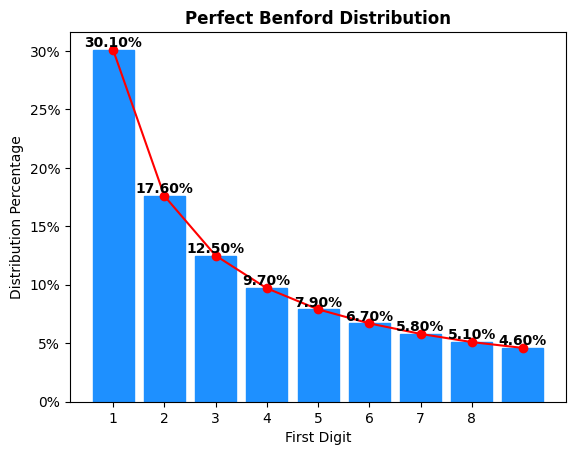

In [4]:
plt.bar(df1['d'], df1['benford'], color='dodgerblue', edgecolor='dodgerblue')
plt.plot(df1['d'], df1['benford'], 'r-o', linewidth=1.5)
for i, benford_value in enumerate(df1['benford']):
    plt.text(i+1, benford_value, f'{benford_value * 100:.2f}%',
             ha='center', va='bottom',fontweight='bold', color='black')
plt.title('Perfect Benford Distribution', fontweight='bold')
plt.xlabel('First Digit')
plt.ylabel('Distribution Percentage')
plt.xticks(range(1, 9))
plt.gca().yaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x * 100:.0f}%')
)
plt.show()

In [5]:
print(sum(df1.benford))

1.0


In [6]:
print(round(np.log10(2), 3))
print(round(np.log10(1.1111111), 3))

0.301
0.046


In [7]:
df2 = pd.DataFrame({'row_number': list(range(1, 1001))})
df2 = df2.assign(uniform_distribution=np.random.randint(1, 10, size=1000))

In [8]:
print(df2.head(n=3))
print(df2.tail(n=3))

   row_number  uniform_distribution
0           1                     7
1           2                     5
2           3                     1
     row_number  uniform_distribution
997         998                     4
998         999                     3
999        1000                     3


In [9]:
results1 = df2.groupby('uniform_distribution').size().reset_index(name='count')
print(results1)

   uniform_distribution  count
0                     1    108
1                     2    111
2                     3    112
3                     4    115
4                     5    101
5                     6     97
6                     7    121
7                     8    126
8                     9    109


In [10]:
df3 = df2[['row_number']].copy()

df3 = df3.assign(random_distribution=np.random.choice(np.arange(1, 10), size=1000))

print(df3.head(n=3))
print(df3.tail(n=3))

   row_number  random_distribution
0           1                    5
1           2                    6
2           3                    5
     row_number  random_distribution
997         998                    3
998         999                    5
999        1000                    6


In [11]:
results2 = (df3.groupby('random_distribution').size().reset_index(name='count'))
print(results2)

   random_distribution  count
0                    1     94
1                    2    103
2                    3    123
3                    4    130
4                    5    131
5                    6    110
6                    7    104
7                    8    105
8                    9    100


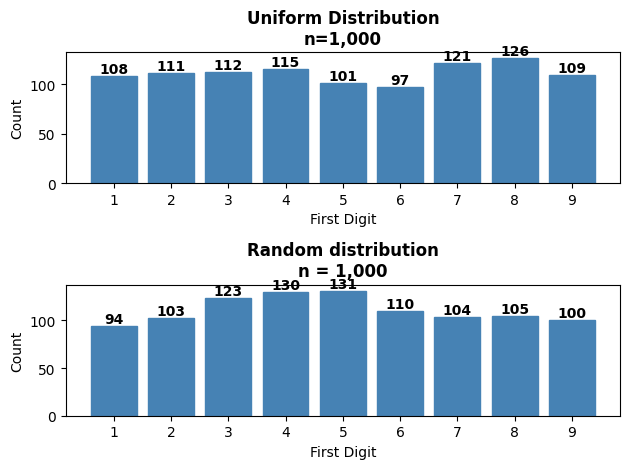

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.bar(results1['uniform_distribution'], results1['count'], color='steelblue', edgecolor='steelblue')
for i, n in enumerate(results1['count']):
    ax1.text(results1['uniform_distribution'][i], n, str(n),
            ha = 'center', va = 'bottom',
            fontweight = 'bold', color = 'black')
ax1.set_title('Uniform Distribution\nn=1,000', fontweight='bold')
ax1.set_xlabel('First Digit')
ax1.set_ylabel('Count')
ax1.set_xticks(range(1, 10))

ax2.bar(results2['random_distribution'], results2['count'],
        color = 'steelblue', edgecolor = 'steelblue')
for i, n in enumerate(results2['count']):
    ax2.text(results2['random_distribution'][i], n, str(n),
            ha = 'center', va = 'bottom',
            fontweight = 'bold', color = 'black')
ax2.set_title('Random distribution\nn = 1,000', fontweight = 'bold')
ax2.set_xlabel('First Digit')
ax2.set_ylabel('Count')
ax2.set_xticks(range(1, 10))

plt.tight_layout()
plt.show()


In [13]:
street_addresses = pd.read_csv('./data/street_address_listing.csv', usecols=[0])
print(street_addresses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194836 entries, 0 to 194835
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   ADDRESS_NO  194836 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB
None


In [15]:
street_addresses['first_digit'] = (street_addresses['ADDRESS_NO'].apply(lambda x: str(x)[0]))
print(street_addresses.head(10))

       ADDRESS_NO first_digit
0  7353 STE B 282           7
1      9007 STE 9           9
2     5830 STE A6           5
3    4520 STE 103           4
4      8334 STE D           8
5    4250 UNIT 14           4
6            8316           8
7      1707 STE E           1
8           14261           1
9            8926           8


In [16]:
unique_values = set(street_addresses.first_digit)
print(unique_values)

{'B', '4', '1', '7', 'T', '2', 'A', '8', '9', '3', '5', '6'}


In [17]:
street_addresses = street_addresses[street_addresses['first_digit'].isin(['1', '2', '3', '4', '5', '6', '7', '8', '9'])]

In [18]:
street_addresses['first_digit'] = (street_addresses['first_digit'].astype(int))


Initialized sequence with 193997 registries.

Test performed on 193997 registries.
Discarded 0 records < 1 after preparation.


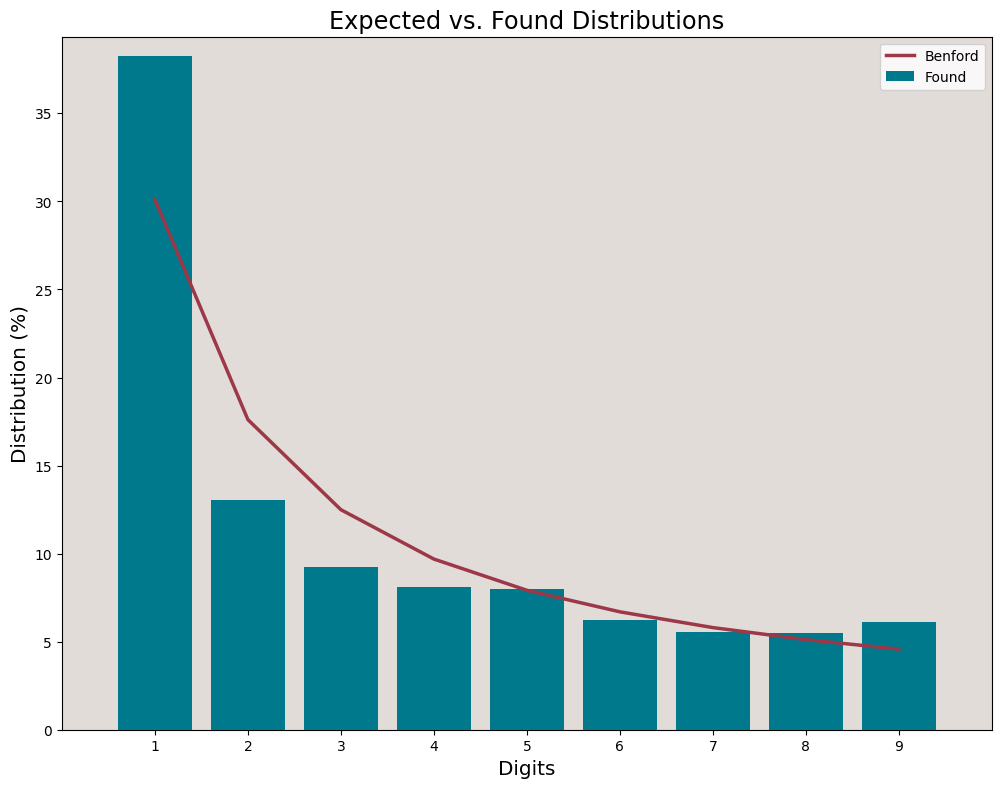

In [20]:
bf_street_addresses = bf.first_digits(street_addresses.first_digit, digs = 1)

In [21]:
populations = pd.read_csv('./data/population_by_country_2020.csv', usecols=[1])
print(populations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Population  235 non-null    int64
dtypes: int64(1)
memory usage: 2.0 KB
None


In [22]:
populations['first_digit'] = populations['Population'].apply(lambda x: str(x)[0])
print(populations.head(10))

   Population first_digit
0  1440297825           1
1  1382345085           1
2   331341050           3
3   274021604           2
4   221612785           2
5   212821986           2
6   206984347           2
7   164972348           1
8   145945524           1
9   129166028           1


In [23]:
populations['first_digit'] = populations['first_digit'].astype(int)


Initialized sequence with 235 registries.

Test performed on 235 registries.
Discarded 0 records < 1 after preparation.


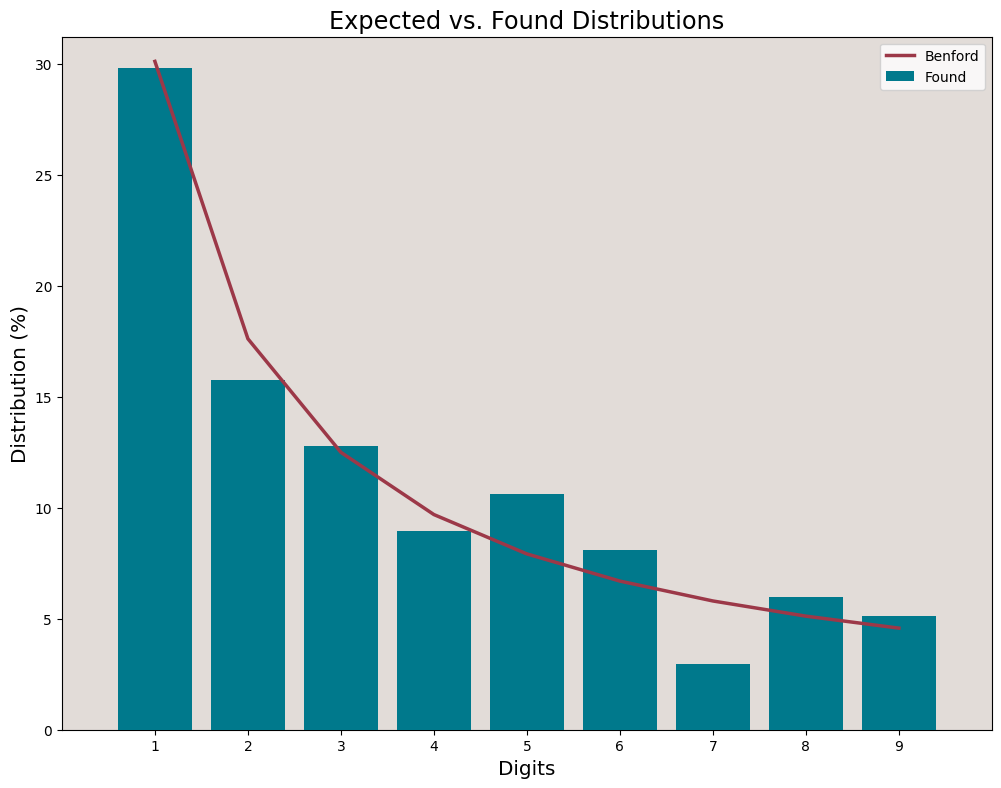

In [24]:
bf_populations = bf.first_digits(populations.first_digit, digs=1)

In [25]:
payments = pd.read_csv('./data/corporate_payments.csv', usecols=[3])
print(payments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189470 entries, 0 to 189469
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Amount  189470 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB
None


In [26]:
payments['first_digit'] = payments['Amount'].apply(lambda x: str(x)[0])
print(payments.head(10))

   Amount first_digit
0   36.08           3
1   77.80           7
2   34.97           3
3   59.00           5
4   59.56           5
5   50.38           5
6   26.57           2
7  102.17           1
8   25.19           2
9   37.31           3


In [27]:
payments = payments[(payments.first_digit >= '1') & (payments.first_digit <= '9')]

In [28]:
payments['first_digit'] = payments['first_digit'].astype(int)


Initialized sequence with 184412 registries.

Test performed on 184412 registries.
Discarded 0 records < 1 after preparation.


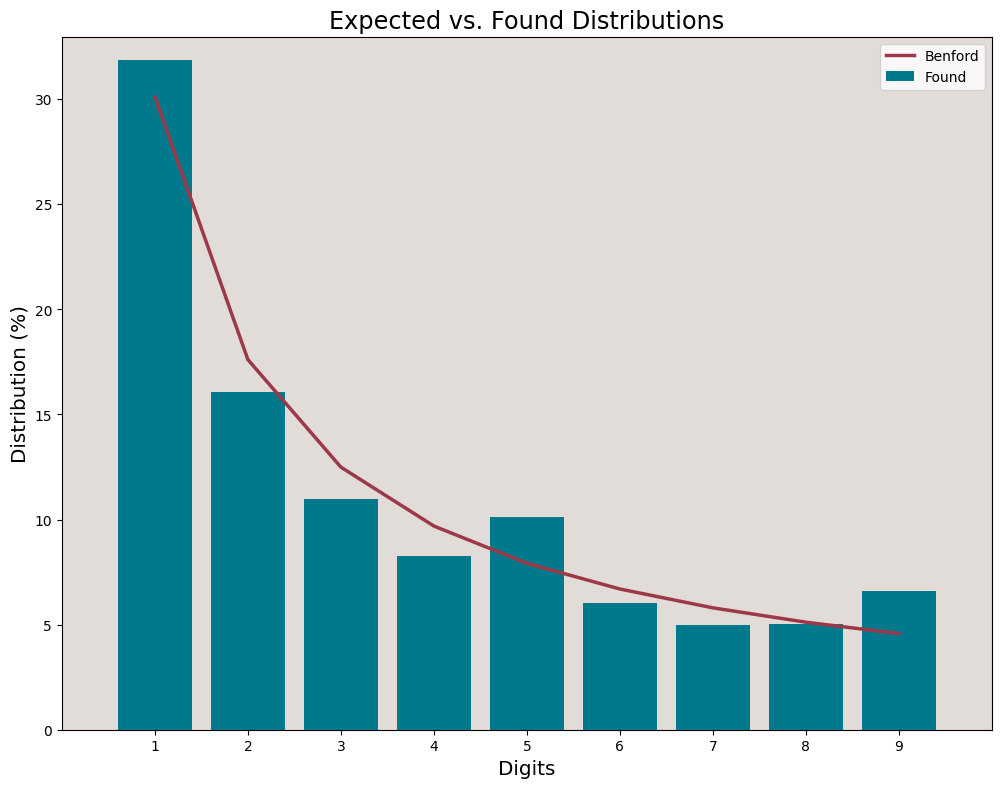

             Counts     Found  Expected
First_1_Dig                            
1             58759  0.318629  0.301030
2             29660  0.160836  0.176091
3             20284  0.109993  0.124939
4             15269  0.082798  0.096910
5             18695  0.101376  0.079181
6             11104  0.060213  0.066947
7              9194  0.049856  0.057992
8              9298  0.050420  0.051153
9             12149  0.065880  0.045757


In [29]:
bf_payments = bf.first_digits(payments.first_digit, digs = 1)
print(bf_payments)

In [30]:
bf_populations = bf_populations.assign(Expected_Counts = \
                                       bf_populations.Expected * sum(bf_populations.Counts)
                                       )
print(bf_populations)

             Counts     Found  Expected  Expected_Counts
First_1_Dig                                             
1                70  0.297872  0.301030        70.742049
2                37  0.157447  0.176091        41.381446
3                30  0.127660  0.124939        29.360603
4                21  0.089362  0.096910        22.773853
5                25  0.106383  0.079181        18.607593
6                19  0.080851  0.066947        15.732496
7                 7  0.029787  0.057992        13.628108
8                14  0.059574  0.051153        12.020843
9                12  0.051064  0.045757        10.753010


In [31]:
x2 = stats.chisquare(bf_populations.Counts,
                     bf_populations.Expected_Counts)
print(x2)

Power_divergenceResult(statistic=np.float64(7.192526063677557), pvalue=np.float64(0.5160103482305226))


In [32]:
MAD = bf.mad(populations.first_digit, test = 1, decimals = 0)
print(MAD)

0.012790028799782804


In [33]:
AM = populations['first_digit'].mean()
print(AM)

3.5148936170212766


In [34]:
EM = ((1 * 70.742) + (2 * 41.381) + (3 * 29.361) +
     (4 * 22.774) + (5 * 18.608) + (6 * 15.732) +
     (7 * 13.628) + (8 * 12.021) + (9 * 10.753)) / 235
print(EM)

3.4402382978723405


In [35]:
DF = (100 * (AM - EM)) / EM
print(DF)

2.1700624400091013


In [36]:
SD = np.std(populations['first_digit'])
print(SD)

2.4760107519964065


In [37]:
Z = DF / SD
print(Z)

0.8764349824649916


In [38]:
populations['log'] = np.log10(populations['Population'])

populations['mantissa'] = populations['log'] - populations['log'].astype(int)

print(populations.head(10))

   Population  first_digit       log  mantissa
0  1440297825            1  9.158452  0.158452
1  1382345085            1  9.140616  0.140616
2   331341050            3  8.520275  0.520275
3   274021604            2  8.437785  0.437785
4   221612785            2  8.345595  0.345595
5   212821986            2  8.328016  0.328016
6   206984347            2  8.315938  0.315938
7   164972348            1  8.217411  0.217411
8   145945524            1  8.164191  0.164191
9   129166028            1  8.111148  0.111148


In [39]:
print(populations['mantissa'].mean())

print(populations['mantissa'].var())

print(kurtosis(populations['mantissa'], fisher = True))

print(skew(populations['mantissa']))

populations = populations.sort_values(by = 'mantissa')

populations['rank'] = list(range(1, 236))

print(populations.head(3))
print(populations.tail(3))


0.5087762832181758
0.08797164279797032
-1.177858418956045
-0.1128415794074036
    Population  first_digit       log  mantissa  rank
90    10110233            1  7.004761  0.004761     1
89    10154978            1  7.006679  0.006679     2
88    10191409            1  7.008234  0.008234     3
     Population  first_digit       log  mantissa  rank
159      990447            9  5.995831  0.995831   233
92      9910892            9  6.996113  0.996113   234
91      9931333            9  6.997008  0.997008   235


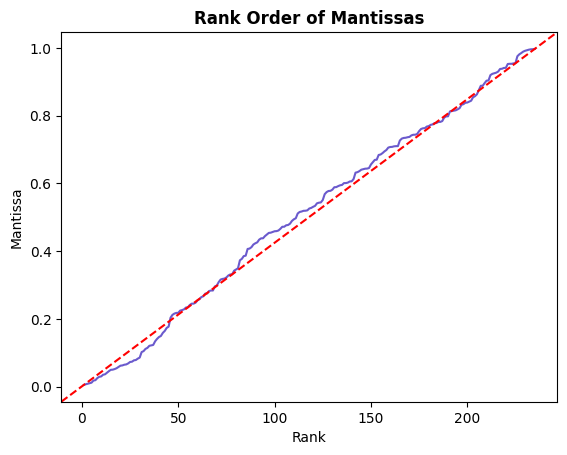

In [41]:
fig, ax = plt.subplots()
plt.plot(populations['rank'], populations['mantissa'],
        color = 'slateblue', linewidth = 1.5)
plt.plot([0, 1], [0, 1], transform = ax.transAxes,
        color = 'red', linestyle = '--')
plt.title('Rank Order of Mantissas', fontweight = 'bold')
plt.xlabel('Rank')
plt.ylabel('Mantissa')
plt.show()